# Importing Dataset


In [1]:
!kaggle datasets download -d cities/titanic123

Dataset URL: https://www.kaggle.com/datasets/cities/titanic123
License(s): unknown
  0% 0.00/22.1k [00:00<?, ?B/s]
100% 22.1k/22.1k [00:00<00:00, 30.1MB/s]


In [2]:
!unzip "titanic123.zip"

Archive:  titanic123.zip
  inflating: ChanDarren_RaiTaran_Lab2a.csv  


In [3]:
import pandas as pd
df=pd.read_csv("ChanDarren_RaiTaran_Lab2a.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Age is suspicious.


In [6]:
import pandas as pd

def advanced_summary(df, describe=True, missing_values=True, unique_values=True, dtypes=True):
    """
    This function provides an advanced summary of a given pandas DataFrame. It can return descriptive statistics,
    missing values, unique values, and data types of each column.

    Parameters:
    df (pd.DataFrame): The DataFrame to summarize.
    describe (bool): If True, includes descriptive statistics (count, mean, std, min, etc.). Default is True.
    missing_values (bool): If True, includes missing value count for each column. Default is True.
    unique_values (bool): If True, includes the number of unique values per column. Default is True.
    dtypes (bool): If True, includes the data types of each column. Default is True.

    Returns:
    summary (dict): A dictionary containing the selected summary statistics for the DataFrame.
    """

    summary = {}
    print("Starting the advanced summary generation for the DataFrame...")

    # Descriptive statistics
    if describe:
        print("Calculating descriptive statistics...")
        summary['descriptive_statistics'] = df.describe(include='all')

    # Missing values count
    if missing_values:
        print("Calculating missing values...")
        summary['missing_values'] = df.isnull().sum()

    # Unique values count
    if unique_values:
        print("Calculating unique values...")
        summary['unique_values'] = df.nunique()

    # Data types of each column
    if dtypes:
        print("Collecting data types...")
        summary['data_types'] = df.dtypes

    print("Advanced summary generation completed.")

    return summary

# Example usage:
# summary = advanced_summary(your_dataframe)
# print(summary)

In [7]:
summary = advanced_summary(df)

Starting the advanced summary generation for the DataFrame...
Calculating descriptive statistics...
Calculating missing values...
Calculating unique values...
Advanced summary generation completed.


In [8]:
summary

{'descriptive_statistics':         PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age     

- Cabin and Age have alot of missing values.
- Age: the missing values are not much, they can be replaced.
- Cabin: the missing values are too much therefore it should be dropped.

In [9]:
def drop_columns(df, columns):
    """
    Drop specified columns from the dataframe.

    Parameters:
    df (DataFrame): The DataFrame from which to drop columns.
    columns (list): List of column names to drop.

    Returns:
    DataFrame: A new DataFrame with the specified columns dropped.
    """
    dropped_df = df.drop(columns=columns)
    print(f"Dropped columns: {columns}. The resulting DataFrame has {dropped_df.shape[1]} columns.")
    return dropped_df

In [11]:
columns=["Cabin"]

df=drop_columns(df,columns)

Dropped columns: ['Cabin']. The resulting DataFrame has 11 columns.


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
import pandas as pd

def replace_missing_values(df, column, method='mean', custom_value=None):
    """
    This function replaces missing values in a specified column of a pandas DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column where missing values need to be replaced.
    column (str): The column name where missing values will be replaced.
    method (str): The method to use for replacing missing values. Options are 'mean', 'median', 'mode', or 'custom'.
                  Default is 'mean'.
    custom_value: A custom value to replace missing values with (only used if method is 'custom').

    Returns:
    pd.DataFrame: The DataFrame with missing values replaced in the specified column.
    """

    if column not in df.columns:
        print(f"Column '{column}' does not exist in the DataFrame.")
        return df

    print(f"Replacing missing values in column '{column}' using method: {method}")

    # Replace based on the chosen method
    if method == 'mean':
        value_to_replace = df[column].mean()
        print(f"Mean value of column '{column}': {value_to_replace}")

    elif method == 'median':
        value_to_replace = df[column].median()
        print(f"Median value of column '{column}': {value_to_replace}")

    elif method == 'mode':
        value_to_replace = df[column].mode()[0]  # Get the first mode value
        print(f"Mode value of column '{column}': {value_to_replace}")

    elif method == 'custom':
        if custom_value is not None:
            value_to_replace = custom_value
            print(f"Custom value used for replacement: {custom_value}")
        else:
            print("Custom value is not provided. No changes made.")
            return df
    else:
        print("Invalid method. Please choose from 'mean', 'median', 'mode', or 'custom'.")
        return df

    # Replace the missing values
    df[column].fillna(value_to_replace, inplace=True)
    print(f"Missing values in column '{column}' have been replaced.")

    return df

# Example usage:
# df = replace_missing_values(df, 'column_name', method='median')

In [18]:
df_new=replace_missing_values(df,"Age", "mean")

Replacing missing values in column 'Age' using method: mean
Mean value of column 'Age': 29.69911764705882
Missing values in column 'Age' have been replaced.


In [19]:
def missing_value_percentage(df):
    """
    Calculates the percentage of missing values for each column in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame.

    Returns:
    DataFrame: DataFrame showing the percentage of missing values for each column.
    """
    missing_percentage = df.isnull().mean() * 100
    print(f"Missing value percentage per column:\n{missing_percentage}")
    return missing_percentage

In [20]:
per=missing_value_percentage(df)

Missing value percentage per column:
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64


In [21]:
df["Embarked"]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [23]:
df.Embarked.mode()

,Embarked
0,S


In [25]:
df_new=replace_missing_values(df, "Embarked", "mode")

Replacing missing values in column 'Embarked' using method: mode
Mode value of column 'Embarked': S
Missing values in column 'Embarked' have been replaced.


In [27]:
per=missing_value_percentage(df_new)

Missing value percentage per column:
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


In [28]:
def boxplot(df, column):
    """
    Creates a boxplot for the specified column.

    Parameters:
    df (DataFrame): The DataFrame.
    column (str): The column to create the boxplot for.

    Returns:
    None
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()
    print(f"Boxplot created for {column}.")

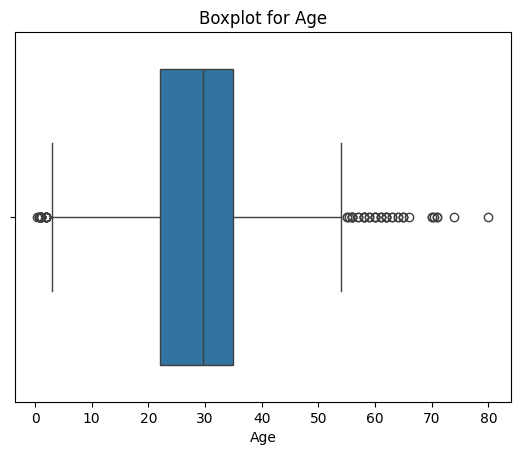

Boxplot created for Age.


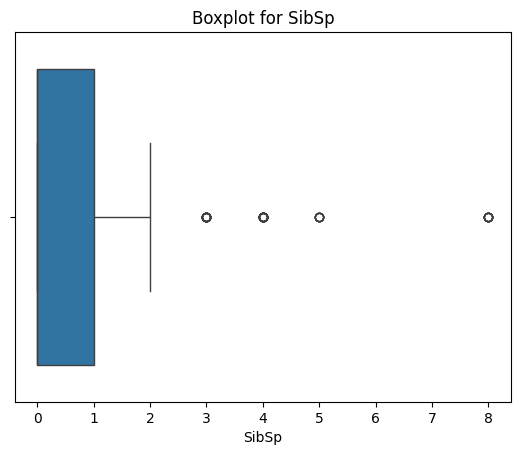

Boxplot created for SibSp.


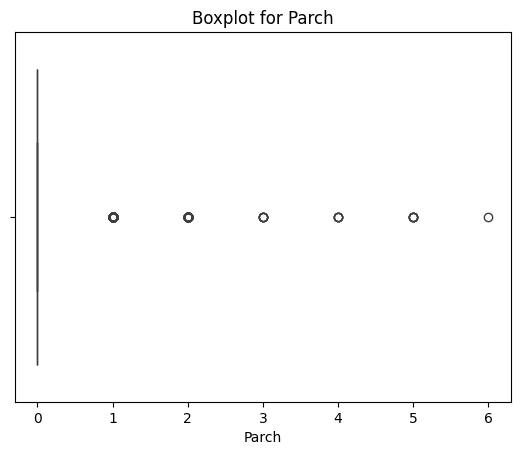

Boxplot created for Parch.


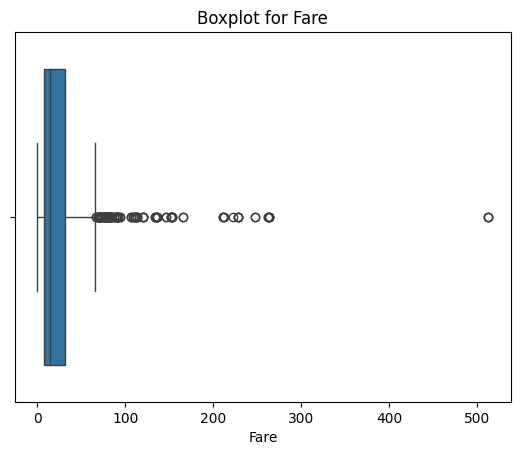

Boxplot created for Fare.


In [29]:
columns=["Age","SibSp","Parch","Fare"]
for col in columns:
  boxplot(df,col)

In [31]:
df_new[df_new["Age"]>55].count()

,0
PassengerId,40
Survived,40
Pclass,40
Name,40
Sex,40
Age,40
SibSp,40
Parch,40
Ticket,40
Fare,40


In [32]:
def handle_outliers(df, column, method='IQR'):
    """
    Handles outliers in the specified column using the chosen method.

    Parameters:
    df (DataFrame): The DataFrame.
    column (str): The column to check for outliers.
    method (str): The method to handle outliers ('IQR' or 'Z-score').

    Returns:
    DataFrame: DataFrame with handled outliers.
    """
    if method == 'IQR':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df_cleaned = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
        print(f"Outliers in {column} handled using IQR method.")
    elif method == 'Z-score':
        from scipy import stats
        df_cleaned = df[(abs(stats.zscore(df[column])) < 3)]
        print(f"Outliers in {column} handled using Z-score method.")
    return df_cleaned

In [33]:
df_handled=handle_outliers(df, "Age", method='IQR')

Outliers in Age handled using IQR method.


In [34]:
df_new.shape, df_handled.shape

((891, 11), (825, 11))

In [35]:
df=df_handled
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
!pip install sweetviz
def profile_data(df, filename='report.html'):
    """
    Generates a profile report of the DataFrame using Sweetviz.

    Parameters:
    df (DataFrame): The DataFrame.
    filename (str): Name of the file to save the report.

    Returns:
    None
    """
    import sweetviz as sv
    report = sv.analyze(df)
    report.show_html(filename)
    print(f"Profile report generated and saved as {filename}.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 41.9 MB/s eta 0:00:00


In [39]:
profile_data(df)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Profile report generated and saved as report.html.


In [40]:
df= df[~df.index.duplicated(keep='first')]

In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [42]:
def barplot(df, column):
    """
    Creates a bar plot for the specified categorical column.

    Parameters:
    df (DataFrame): The DataFrame.
    column (str): The column to create the bar plot for.

    Returns:
    None
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.countplot(x=df[column])
    plt.title(f"Barplot for {column}")
    plt.show()
    print(f"Barplot created for {column}.")

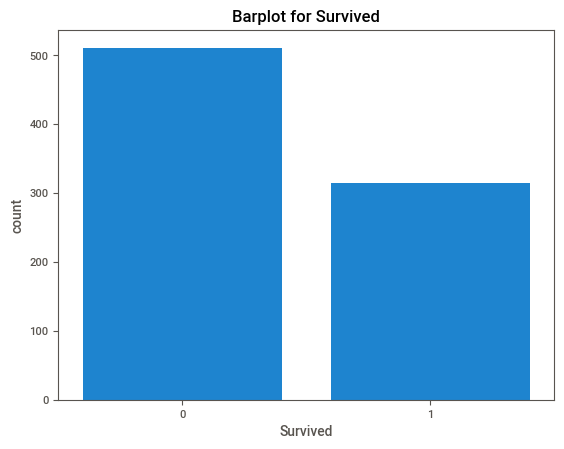

Barplot created for Survived.


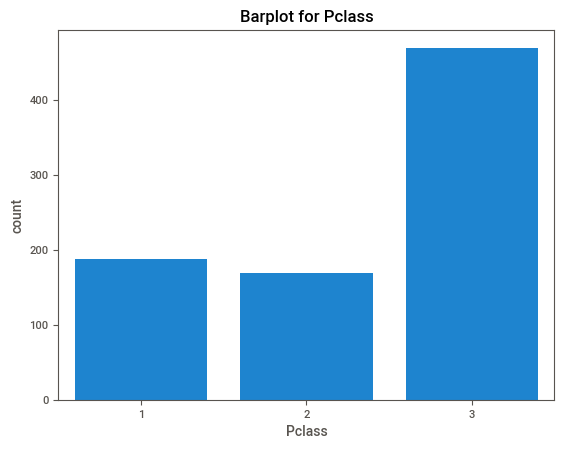

Barplot created for Pclass.


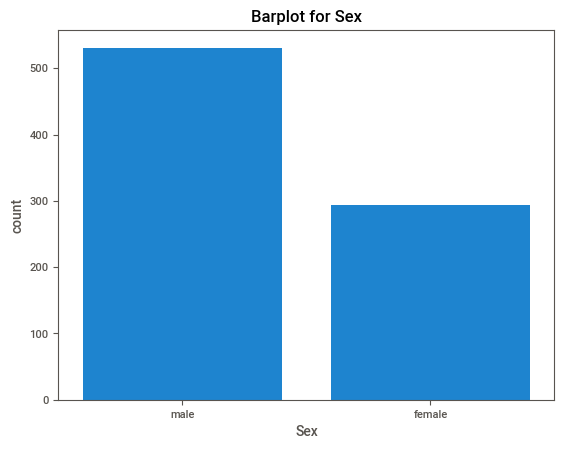

Barplot created for Sex.


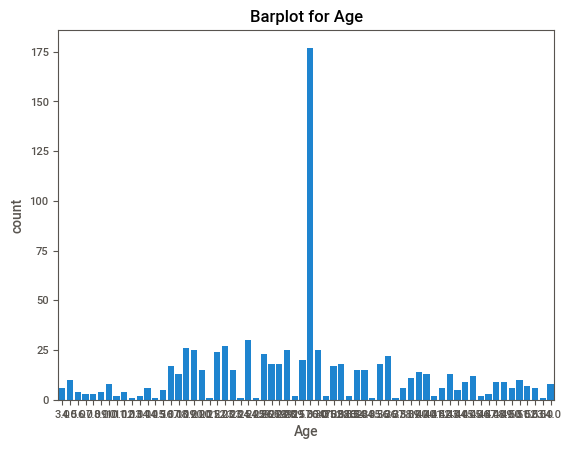

Barplot created for Age.


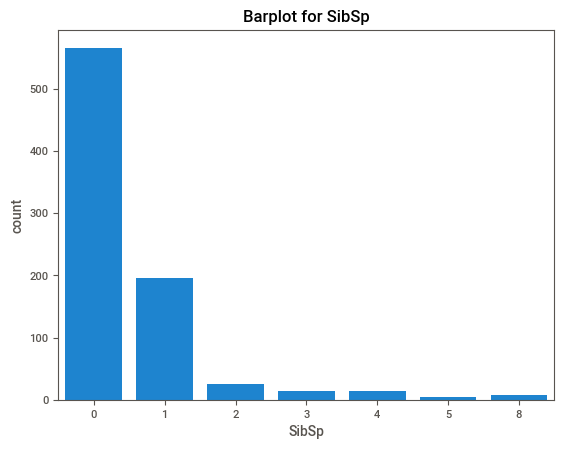

Barplot created for SibSp.


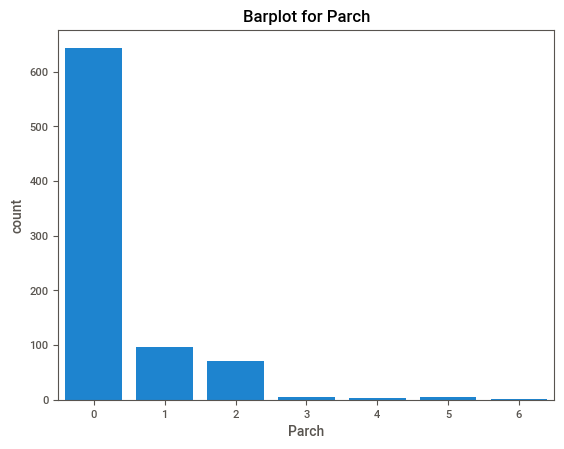

Barplot created for Parch.


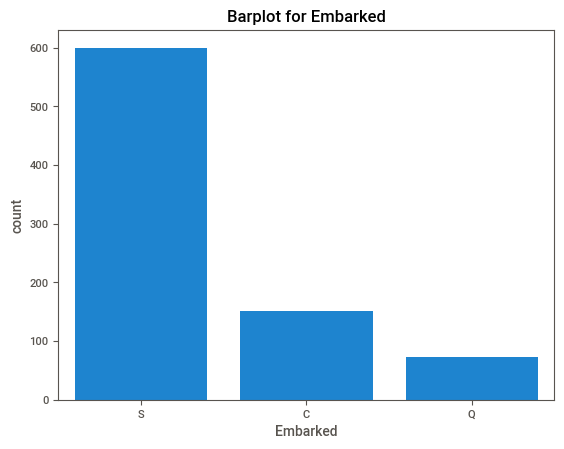

Barplot created for Embarked.


In [44]:
columns=[ 'Survived', 'Pclass','Sex', 'Age', 'SibSp',
       'Parch',  'Embarked']
for col in columns:
  barplot(df,col)

In [52]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df, column):
    """
    Encode categorical column labels as numeric values.

    Parameters:
    df (DataFrame): The DataFrame to modify.
    column (str): Name of the categorical column to encode.

    Returns:
    DataFrame: DataFrame with label-encoded column.
    """
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    print(f"Label encoding applied to column: {column}.")
    return df

In [53]:
label_encoding(df, "Age")
label_encoding(df, "Embarked")
label_encoding(df, "Sex")
label_encoding(df, "Parch")

Label encoding applied to column: Age.
Label encoding applied to column: Embarked.
Label encoding applied to column: Sex.
Label encoding applied to column: Parch.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,21,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,45,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,27,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,41,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,41,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,28,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,17,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,32,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,27,0,0,111369,30.0000,0


In [54]:
columns=["PassengerId", "Name", "Ticket"]

df=drop_columns(df,columns)

Dropped columns: ['PassengerId', 'Name', 'Ticket']. The resulting DataFrame has 8 columns.


In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,21,1,0,7.2500,2
1,1,1,0,45,1,0,71.2833,0
2,1,3,0,27,0,0,7.9250,2
3,1,1,0,41,1,0,53.1000,2
4,0,3,1,41,0,0,8.0500,2


In [58]:
df["target"]=df["Survived"]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,target
0,0,3,1,21,1,0,7.2500,2,0
1,1,1,0,45,1,0,71.2833,0,1
2,1,3,0,27,0,0,7.9250,2,1
3,1,1,0,41,1,0,53.1000,2,1
4,0,3,1,41,0,0,8.0500,2,0


In [59]:
columns=["Survived"]

df=drop_columns(df,columns)

Dropped columns: ['Survived']. The resulting DataFrame has 8 columns.


In [60]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,target
0,3,1,21,1,0,7.2500,2,0
1,1,0,45,1,0,71.2833,0,1
2,3,0,27,0,0,7.9250,2,1
3,1,0,41,1,0,53.1000,2,1
4,3,1,41,0,0,8.0500,2,0


In [61]:
def split_dataframe(df, test_size=0.2, random_state=None):
    """
    Splits a DataFrame into training and testing sets.

    Parameters:
    - df: The DataFrame to split.
    - test_size: Proportion of the dataset to include in the test split (default is 0.2).
    - random_state: Seed for the random number generator (default is None).

    Returns:
    - X_train: Training features.
    - X_test: Testing features.
    - y_train: Training target.
    - y_test: Testing target.
    """
    # Assuming the last column is the target variable
    from sklearn.model_selection import train_test_split
    X = df.iloc[:, :-1]  # Features
    y = df.iloc[:, -1]   # Target

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [63]:
xtrain,xtest, ytrain, ytest=split_dataframe(df, test_size=0.2, random_state=22)

In [64]:
def train_classification_models(X_train, y_train, X_test, y_test):
    """
    Trains several classification models and evaluates their performance.

    Parameters:
    X_train (array): Training features.
    y_train (array): Training target.
    X_test (array): Test features.
    y_test (array): Test target.

    Returns:
    dict: Dictionary with model names and their accuracy scores.
    """
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Support Vector Machine': SVC()
    }

    scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        scores[name] = accuracy
        print(f"{name}: Accuracy = {accuracy:.2f}")

    return scores

In [65]:
scores=train_classification_models(xtrain,ytrain,xtest,ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.81
Random Forest: Accuracy = 0.84
Gradient Boosting: Accuracy = 0.86
Support Vector Machine: Accuracy = 0.76


In [66]:
def train_xgboost_classifier(X_train, y_train, X_test, y_test):
    """
    Trains and evaluates an XGBoost classifier.

    Parameters:
    X_train (array): Training features.
    y_train (array): Training target.
    X_test (array): Test features.
    y_test (array): Test target.

    Returns:
    float: Accuracy of the XGBoost classifier.
    """
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score

    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"XGBoost Classifier Accuracy: {accuracy:.2f}")

    return accuracy

In [67]:
acc=train_xgboost_classifier(xtrain,ytrain,xtest,ytest)

XGBoost Classifier Accuracy: 0.85


In [68]:
def train_lightgbm_classifier(X_train, y_train, X_test, y_test):
    """
    Trains and evaluates a LightGBM classifier.

    Parameters:
    X_train (array): Training features.
    y_train (array): Training target.
    X_test (array): Test features.
    y_test (array): Test target.

    Returns:
    float: Accuracy of the LightGBM classifier.
    """
    from lightgbm import LGBMClassifier
    from sklearn.metrics import accuracy_score

    model = LGBMClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"LightGBM Classifier Accuracy: {accuracy:.2f}")

    return accuracy

In [69]:
acc2=train_lightgbm_classifier(xtrain,ytrain,xtest,ytest)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 259, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 660, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392424 -> initscore=-0.437133
[LightGBM] [Info] Start training from score -0.437133
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# The Best Model
**Gradient Boosting** with **86 %** accuracy.